# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

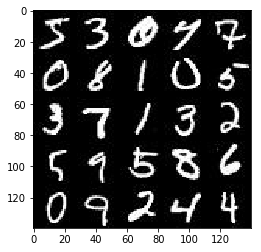

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

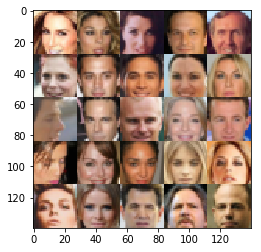

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

C:\Users\joban\Anaconda3\envs\gpu1\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.8.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_image_dim = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), "input_image_dim")
    z_dim = tf.placeholder(tf.float32, (None, z_dim), "z_dim")
    learning_rate = tf.placeholder(tf.float32)
    
    return input_image_dim, z_dim, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope("discriminator", reuse = reuse):
        alpha = 0.2
    
        convLayer = tf.layers.conv2d(images, 32, 5, strides = 2, padding = "same")
        convLayer = tf.maximum(convLayer, convLayer*alpha)
        
        convLayer = tf.layers.conv2d(convLayer, 64, 5, strides = 2, padding = "same")
        convLayer = tf.layers.batch_normalization(convLayer, training = True)
        convLayer = tf.maximum(convLayer, convLayer*alpha)
        
        convLayer = tf.layers.conv2d(convLayer, 128, 5, strides = 2, padding = "same")
        convLayer = tf.layers.batch_normalization(convLayer, training = True)
        convLayer = tf.maximum(convLayer, convLayer*alpha)
    
        convLayer = tf.reshape(convLayer, (-1, 4 * 4 * 128))
        logits = tf.layers.dense(convLayer, 1)
        output = tf.nn.sigmoid(logits)
    
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope("generator", reuse = not is_train):
        alpha = 0.2
        
        convLayer = tf.layers.dense(z, 7*7*512)
        convLayer = tf.reshape(convLayer, (-1, 7, 7, 512))
        convLayer = tf.layers.batch_normalization(convLayer, training = is_train)
        convLayer = tf.maximum(convLayer, convLayer*alpha)
        
        convLayer = tf.layers.conv2d_transpose(convLayer, 256, 5, strides = 2, padding = "same")
        convLayer = tf.layers.batch_normalization(convLayer, training = is_train)
        convLayer = tf.maximum(convLayer, convLayer*alpha)
        
        convLayer = tf.layers.conv2d_transpose(convLayer, 128, 5, strides = 2, padding = "same")
        convLayer = tf.layers.batch_normalization(convLayer, training = is_train)
        convLayer = tf.maximum(convLayer, convLayer*alpha)
        
        logits = tf.layers.dense(convLayer, out_channel_dim)
        output = tf.nn.tanh(logits)
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    model_gen = generator(input_z, out_channel_dim)
    model_real, model_logits_real = discriminator(input_real, reuse=False)
    model_fake, model_logits_fake = discriminator(model_gen, reuse=True)
    
    real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_logits_real, labels=tf.ones_like(model_real)))
    fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_logits_fake, labels=tf.zeros_like(model_fake)))
    model_gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_logits_fake, labels=tf.ones_like(model_fake)))
    
    t_loss = real_loss + fake_loss
    
    return t_loss, model_gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    
    discriminator_vars = []
    generator_vars = []
    
    for var in t_vars:
        
        if var.name.startswith("discriminator"):
            discriminator_vars.append(var)
        elif var.name.startswith("generator"):
            generator_vars.append(var)
    
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        discriminator_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(d_loss, var_list = discriminator_vars)
        generator_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(g_loss, var_list = generator_vars)
    
    
    return discriminator_train_opt, generator_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, z_data, learn_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, z_data, data_shape[3])
    d_optimizer, g_optimizer = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    c = 0
    print_gap = 20
    dis_gap = 100
    
   
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                c = c + 1
                batch_images = batch_images*2
                batchpick = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                a = sess.run(d_optimizer, feed_dict={learn_rate:learning_rate, input_real: batch_images, z_data: batchpick})
                b = sess.run(g_optimizer, feed_dict={learn_rate:learning_rate, input_real: batch_images, z_data: batchpick})
                
                if c % print_gap == 0:
                    print("Epoch: {:.0f} of {:.0f}".format(epoch_i+1,epoch_count))
                    print("Discriminator loss: {:.3f}".format(d_loss.eval({z_data: batchpick, input_real: batch_images})))
                    print("Generator loss: {:.3f}".format(g_loss.eval({z_data: batchpick})))
                    
                if c % dis_gap == 0:
                    show_generator_output(sess, 25, z_data, data_shape[3], data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch: 1 of 2
Discriminator loss: 0.034
Generator loss: 7.575
Epoch: 1 of 2
Discriminator loss: 0.280
Generator loss: 3.655
Epoch: 1 of 2
Discriminator loss: 0.297
Generator loss: 2.059
Epoch: 1 of 2
Discriminator loss: 0.845
Generator loss: 1.526
Epoch: 1 of 2
Discriminator loss: 2.343
Generator loss: 0.183


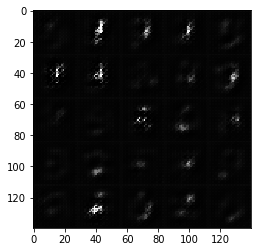

Epoch: 1 of 2
Discriminator loss: 1.315
Generator loss: 0.858
Epoch: 1 of 2
Discriminator loss: 0.791
Generator loss: 1.396
Epoch: 1 of 2
Discriminator loss: 1.132
Generator loss: 0.885
Epoch: 1 of 2
Discriminator loss: 1.612
Generator loss: 0.374
Epoch: 1 of 2
Discriminator loss: 0.582
Generator loss: 1.461


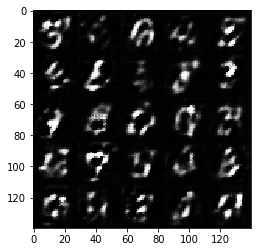

Epoch: 1 of 2
Discriminator loss: 0.907
Generator loss: 1.139
Epoch: 1 of 2
Discriminator loss: 0.667
Generator loss: 1.271
Epoch: 1 of 2
Discriminator loss: 1.011
Generator loss: 0.737
Epoch: 1 of 2
Discriminator loss: 1.065
Generator loss: 0.685
Epoch: 1 of 2
Discriminator loss: 0.801
Generator loss: 1.441


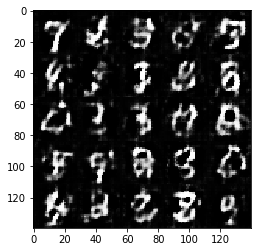

Epoch: 1 of 2
Discriminator loss: 1.123
Generator loss: 0.744
Epoch: 1 of 2
Discriminator loss: 1.068
Generator loss: 0.951
Epoch: 1 of 2
Discriminator loss: 1.073
Generator loss: 1.112
Epoch: 1 of 2
Discriminator loss: 1.119
Generator loss: 1.018
Epoch: 1 of 2
Discriminator loss: 1.252
Generator loss: 0.531


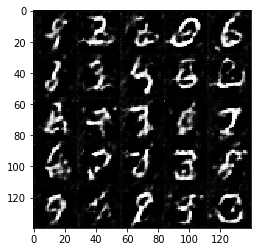

Epoch: 1 of 2
Discriminator loss: 0.839
Generator loss: 1.280
Epoch: 1 of 2
Discriminator loss: 1.025
Generator loss: 0.842
Epoch: 1 of 2
Discriminator loss: 1.261
Generator loss: 0.519
Epoch: 1 of 2
Discriminator loss: 1.104
Generator loss: 0.675
Epoch: 1 of 2
Discriminator loss: 1.037
Generator loss: 0.660


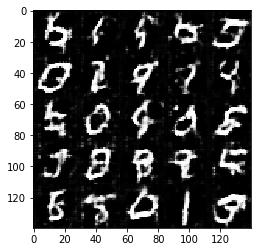

Epoch: 1 of 2
Discriminator loss: 1.130
Generator loss: 0.701
Epoch: 1 of 2
Discriminator loss: 1.117
Generator loss: 0.578
Epoch: 1 of 2
Discriminator loss: 1.554
Generator loss: 0.386
Epoch: 1 of 2
Discriminator loss: 0.493
Generator loss: 1.594
Epoch: 1 of 2
Discriminator loss: 1.755
Generator loss: 0.239


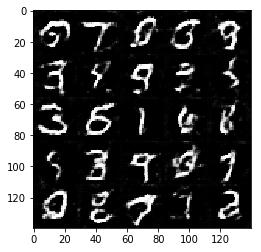

Epoch: 1 of 2
Discriminator loss: 0.878
Generator loss: 0.960
Epoch: 1 of 2
Discriminator loss: 0.892
Generator loss: 0.871
Epoch: 1 of 2
Discriminator loss: 1.133
Generator loss: 0.635
Epoch: 1 of 2
Discriminator loss: 1.348
Generator loss: 0.658
Epoch: 1 of 2
Discriminator loss: 1.032
Generator loss: 1.236


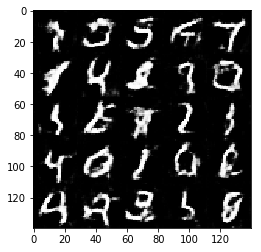

Epoch: 1 of 2
Discriminator loss: 0.855
Generator loss: 0.861
Epoch: 1 of 2
Discriminator loss: 0.938
Generator loss: 1.270
Epoch: 1 of 2
Discriminator loss: 1.078
Generator loss: 0.610
Epoch: 1 of 2
Discriminator loss: 1.071
Generator loss: 0.729
Epoch: 1 of 2
Discriminator loss: 1.406
Generator loss: 0.421


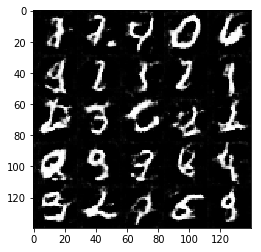

Epoch: 1 of 2
Discriminator loss: 0.908
Generator loss: 0.812
Epoch: 1 of 2
Discriminator loss: 0.744
Generator loss: 1.045
Epoch: 1 of 2
Discriminator loss: 2.392
Generator loss: 0.153
Epoch: 1 of 2
Discriminator loss: 1.097
Generator loss: 0.969
Epoch: 1 of 2
Discriminator loss: 0.862
Generator loss: 0.945


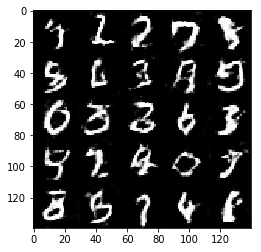

Epoch: 1 of 2
Discriminator loss: 1.296
Generator loss: 0.664
Epoch: 2 of 2
Discriminator loss: 0.933
Generator loss: 0.783
Epoch: 2 of 2
Discriminator loss: 0.845
Generator loss: 2.749
Epoch: 2 of 2
Discriminator loss: 1.157
Generator loss: 0.665
Epoch: 2 of 2
Discriminator loss: 1.004
Generator loss: 0.848


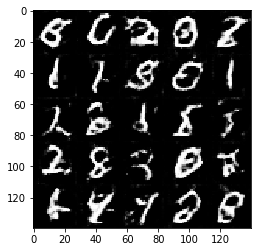

Epoch: 2 of 2
Discriminator loss: 0.758
Generator loss: 1.335
Epoch: 2 of 2
Discriminator loss: 0.890
Generator loss: 0.790
Epoch: 2 of 2
Discriminator loss: 0.805
Generator loss: 1.035
Epoch: 2 of 2
Discriminator loss: 1.135
Generator loss: 0.552
Epoch: 2 of 2
Discriminator loss: 1.575
Generator loss: 0.330


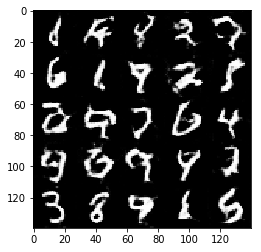

Epoch: 2 of 2
Discriminator loss: 0.958
Generator loss: 1.650
Epoch: 2 of 2
Discriminator loss: 0.771
Generator loss: 1.521
Epoch: 2 of 2
Discriminator loss: 0.905
Generator loss: 1.037
Epoch: 2 of 2
Discriminator loss: 0.724
Generator loss: 1.763
Epoch: 2 of 2
Discriminator loss: 1.105
Generator loss: 0.550


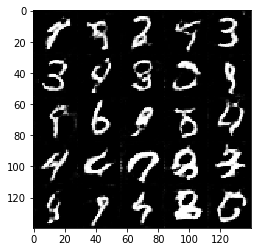

Epoch: 2 of 2
Discriminator loss: 0.910
Generator loss: 1.105
Epoch: 2 of 2
Discriminator loss: 1.148
Generator loss: 0.562
Epoch: 2 of 2
Discriminator loss: 0.442
Generator loss: 1.735
Epoch: 2 of 2
Discriminator loss: 0.746
Generator loss: 1.790
Epoch: 2 of 2
Discriminator loss: 0.954
Generator loss: 0.856


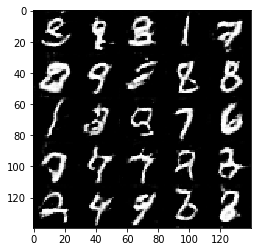

Epoch: 2 of 2
Discriminator loss: 1.552
Generator loss: 0.406
Epoch: 2 of 2
Discriminator loss: 0.966
Generator loss: 0.787
Epoch: 2 of 2
Discriminator loss: 0.513
Generator loss: 1.364
Epoch: 2 of 2
Discriminator loss: 0.940
Generator loss: 0.993
Epoch: 2 of 2
Discriminator loss: 0.953
Generator loss: 0.766


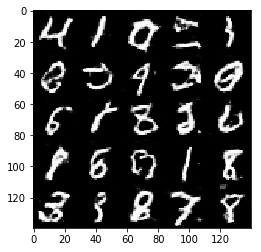

Epoch: 2 of 2
Discriminator loss: 0.872
Generator loss: 1.079
Epoch: 2 of 2
Discriminator loss: 0.609
Generator loss: 1.455
Epoch: 2 of 2
Discriminator loss: 0.663
Generator loss: 1.236
Epoch: 2 of 2
Discriminator loss: 0.823
Generator loss: 1.021
Epoch: 2 of 2
Discriminator loss: 0.295
Generator loss: 2.962


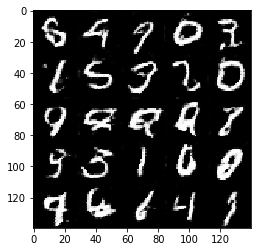

Epoch: 2 of 2
Discriminator loss: 0.967
Generator loss: 0.839
Epoch: 2 of 2
Discriminator loss: 0.287
Generator loss: 2.062
Epoch: 2 of 2
Discriminator loss: 0.493
Generator loss: 1.908
Epoch: 2 of 2
Discriminator loss: 0.403
Generator loss: 2.134
Epoch: 2 of 2
Discriminator loss: 0.425
Generator loss: 1.771


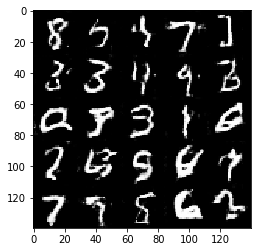

Epoch: 2 of 2
Discriminator loss: 0.779
Generator loss: 1.051
Epoch: 2 of 2
Discriminator loss: 2.061
Generator loss: 0.213
Epoch: 2 of 2
Discriminator loss: 0.823
Generator loss: 0.843
Epoch: 2 of 2
Discriminator loss: 0.789
Generator loss: 0.927
Epoch: 2 of 2
Discriminator loss: 0.864
Generator loss: 0.783


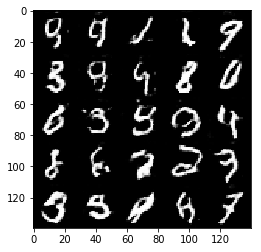

Epoch: 2 of 2
Discriminator loss: 0.832
Generator loss: 0.789
Epoch: 2 of 2
Discriminator loss: 0.870
Generator loss: 0.925
Epoch: 2 of 2
Discriminator loss: 0.642
Generator loss: 1.839
Epoch: 2 of 2
Discriminator loss: 0.796
Generator loss: 0.969
Epoch: 2 of 2
Discriminator loss: 1.039
Generator loss: 0.848


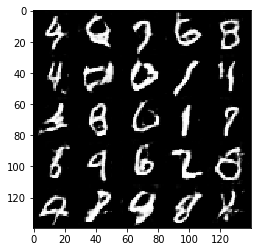

Epoch: 2 of 2
Discriminator loss: 1.554
Generator loss: 0.332
Epoch: 2 of 2
Discriminator loss: 1.105
Generator loss: 0.656
Epoch: 2 of 2
Discriminator loss: 0.548
Generator loss: 1.358


In [13]:
batch_size = 64
z_dim = 128
learning_rate = 0.0008
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch: 1 of 1
Discriminator loss: 0.167
Generator loss: 2.158
Epoch: 1 of 1
Discriminator loss: 0.051
Generator loss: 3.455
Epoch: 1 of 1
Discriminator loss: 0.219
Generator loss: 2.532
Epoch: 1 of 1
Discriminator loss: 0.707
Generator loss: 6.205
Epoch: 1 of 1
Discriminator loss: 0.310
Generator loss: 3.566


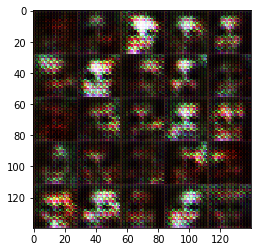

Epoch: 1 of 1
Discriminator loss: 0.106
Generator loss: 3.324
Epoch: 1 of 1
Discriminator loss: 0.885
Generator loss: 0.845
Epoch: 1 of 1
Discriminator loss: 1.190
Generator loss: 1.384
Epoch: 1 of 1
Discriminator loss: 1.563
Generator loss: 0.365
Epoch: 1 of 1
Discriminator loss: 1.327
Generator loss: 0.668


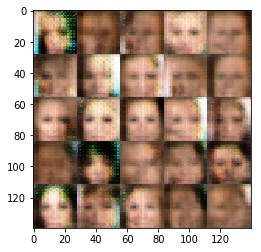

Epoch: 1 of 1
Discriminator loss: 1.686
Generator loss: 1.054
Epoch: 1 of 1
Discriminator loss: 1.096
Generator loss: 0.831
Epoch: 1 of 1
Discriminator loss: 1.171
Generator loss: 1.068
Epoch: 1 of 1
Discriminator loss: 1.671
Generator loss: 0.637
Epoch: 1 of 1
Discriminator loss: 0.822
Generator loss: 1.160


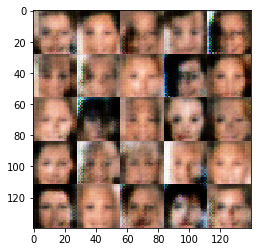

Epoch: 1 of 1
Discriminator loss: 1.470
Generator loss: 0.684
Epoch: 1 of 1
Discriminator loss: 0.817
Generator loss: 0.998
Epoch: 1 of 1
Discriminator loss: 1.523
Generator loss: 3.176
Epoch: 1 of 1
Discriminator loss: 1.558
Generator loss: 0.753
Epoch: 1 of 1
Discriminator loss: 1.034
Generator loss: 1.452


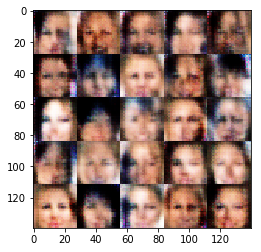

Epoch: 1 of 1
Discriminator loss: 1.013
Generator loss: 0.900
Epoch: 1 of 1
Discriminator loss: 1.352
Generator loss: 0.726
Epoch: 1 of 1
Discriminator loss: 1.289
Generator loss: 0.761
Epoch: 1 of 1
Discriminator loss: 0.660
Generator loss: 1.323
Epoch: 1 of 1
Discriminator loss: 1.489
Generator loss: 1.446


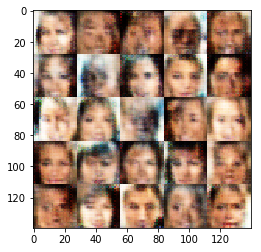

Epoch: 1 of 1
Discriminator loss: 1.130
Generator loss: 1.851
Epoch: 1 of 1
Discriminator loss: 1.161
Generator loss: 0.607
Epoch: 1 of 1
Discriminator loss: 0.763
Generator loss: 1.344
Epoch: 1 of 1
Discriminator loss: 1.274
Generator loss: 0.571
Epoch: 1 of 1
Discriminator loss: 0.920
Generator loss: 0.811


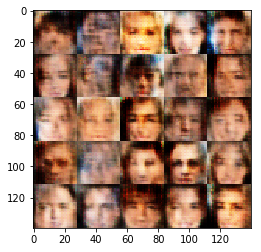

Epoch: 1 of 1
Discriminator loss: 1.148
Generator loss: 0.626
Epoch: 1 of 1
Discriminator loss: 1.153
Generator loss: 2.306
Epoch: 1 of 1
Discriminator loss: 2.481
Generator loss: 2.314
Epoch: 1 of 1
Discriminator loss: 1.297
Generator loss: 0.529
Epoch: 1 of 1
Discriminator loss: 0.816
Generator loss: 0.966


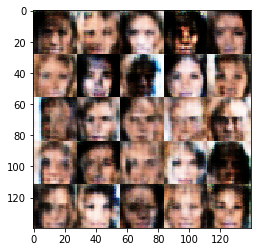

Epoch: 1 of 1
Discriminator loss: 1.334
Generator loss: 0.594
Epoch: 1 of 1
Discriminator loss: 0.634
Generator loss: 1.123
Epoch: 1 of 1
Discriminator loss: 0.692
Generator loss: 1.552
Epoch: 1 of 1
Discriminator loss: 1.138
Generator loss: 1.737
Epoch: 1 of 1
Discriminator loss: 1.057
Generator loss: 0.518


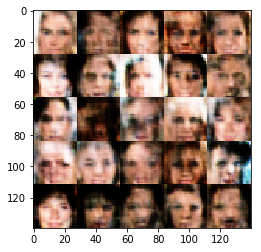

Epoch: 1 of 1
Discriminator loss: 0.483
Generator loss: 1.588
Epoch: 1 of 1
Discriminator loss: 1.066
Generator loss: 0.692
Epoch: 1 of 1
Discriminator loss: 0.694
Generator loss: 1.178
Epoch: 1 of 1
Discriminator loss: 0.434
Generator loss: 1.799
Epoch: 1 of 1
Discriminator loss: 1.211
Generator loss: 0.737


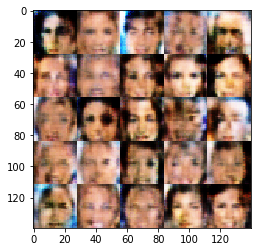

Epoch: 1 of 1
Discriminator loss: 0.994
Generator loss: 1.350
Epoch: 1 of 1
Discriminator loss: 0.356
Generator loss: 1.636
Epoch: 1 of 1
Discriminator loss: 1.496
Generator loss: 0.716
Epoch: 1 of 1
Discriminator loss: 1.299
Generator loss: 0.707
Epoch: 1 of 1
Discriminator loss: 1.387
Generator loss: 0.686


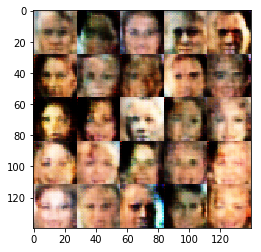

Epoch: 1 of 1
Discriminator loss: 1.477
Generator loss: 0.639
Epoch: 1 of 1
Discriminator loss: 1.279
Generator loss: 0.711
Epoch: 1 of 1
Discriminator loss: 1.406
Generator loss: 0.570
Epoch: 1 of 1
Discriminator loss: 1.328
Generator loss: 0.733
Epoch: 1 of 1
Discriminator loss: 1.473
Generator loss: 0.605


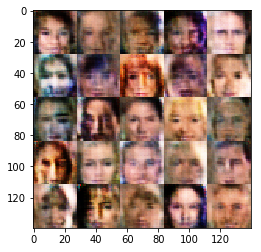

Epoch: 1 of 1
Discriminator loss: 1.203
Generator loss: 0.820
Epoch: 1 of 1
Discriminator loss: 1.354
Generator loss: 1.030
Epoch: 1 of 1
Discriminator loss: 1.382
Generator loss: 0.721
Epoch: 1 of 1
Discriminator loss: 1.315
Generator loss: 0.671
Epoch: 1 of 1
Discriminator loss: 1.439
Generator loss: 0.624


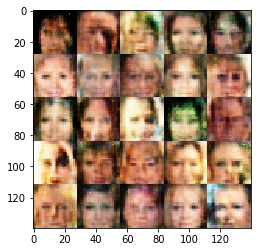

Epoch: 1 of 1
Discriminator loss: 1.343
Generator loss: 0.784
Epoch: 1 of 1
Discriminator loss: 1.426
Generator loss: 0.597
Epoch: 1 of 1
Discriminator loss: 1.365
Generator loss: 0.662
Epoch: 1 of 1
Discriminator loss: 0.253
Generator loss: 2.271
Epoch: 1 of 1
Discriminator loss: 1.731
Generator loss: 0.276


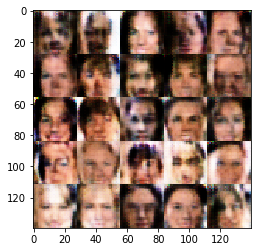

Epoch: 1 of 1
Discriminator loss: 0.655
Generator loss: 2.296
Epoch: 1 of 1
Discriminator loss: 0.892
Generator loss: 0.657
Epoch: 1 of 1
Discriminator loss: 0.603
Generator loss: 1.972
Epoch: 1 of 1
Discriminator loss: 1.193
Generator loss: 1.931
Epoch: 1 of 1
Discriminator loss: 3.769
Generator loss: 3.027


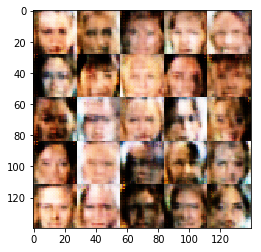

Epoch: 1 of 1
Discriminator loss: 1.368
Generator loss: 0.559
Epoch: 1 of 1
Discriminator loss: 1.370
Generator loss: 0.540
Epoch: 1 of 1
Discriminator loss: 0.586
Generator loss: 1.719
Epoch: 1 of 1
Discriminator loss: 1.246
Generator loss: 0.894
Epoch: 1 of 1
Discriminator loss: 0.493
Generator loss: 1.223


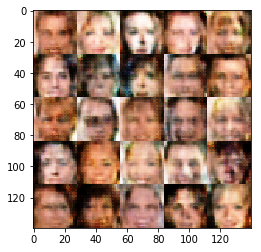

Epoch: 1 of 1
Discriminator loss: 0.316
Generator loss: 1.937
Epoch: 1 of 1
Discriminator loss: 0.477
Generator loss: 1.725
Epoch: 1 of 1
Discriminator loss: 0.121
Generator loss: 2.420
Epoch: 1 of 1
Discriminator loss: 0.088
Generator loss: 3.181
Epoch: 1 of 1
Discriminator loss: 1.203
Generator loss: 1.463


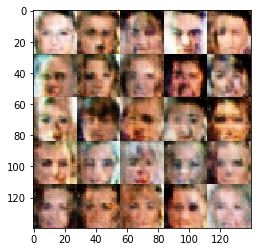

Epoch: 1 of 1
Discriminator loss: 0.572
Generator loss: 1.619
Epoch: 1 of 1
Discriminator loss: 0.384
Generator loss: 1.922
Epoch: 1 of 1
Discriminator loss: 1.553
Generator loss: 1.875
Epoch: 1 of 1
Discriminator loss: 0.436
Generator loss: 1.651
Epoch: 1 of 1
Discriminator loss: 0.244
Generator loss: 3.254


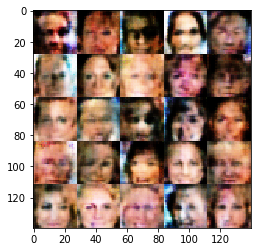

Epoch: 1 of 1
Discriminator loss: 1.594
Generator loss: 1.573
Epoch: 1 of 1
Discriminator loss: 1.601
Generator loss: 0.289
Epoch: 1 of 1
Discriminator loss: 0.782
Generator loss: 1.036
Epoch: 1 of 1
Discriminator loss: 0.286
Generator loss: 3.077
Epoch: 1 of 1
Discriminator loss: 0.849
Generator loss: 0.760


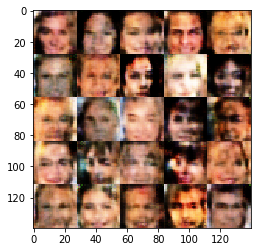

Epoch: 1 of 1
Discriminator loss: 0.786
Generator loss: 0.857
Epoch: 1 of 1
Discriminator loss: 0.680
Generator loss: 0.902
Epoch: 1 of 1
Discriminator loss: 0.984
Generator loss: 1.408
Epoch: 1 of 1
Discriminator loss: 0.524
Generator loss: 1.052
Epoch: 1 of 1
Discriminator loss: 1.257
Generator loss: 0.944


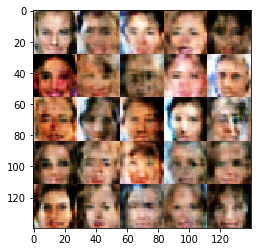

Epoch: 1 of 1
Discriminator loss: 0.336
Generator loss: 2.031
Epoch: 1 of 1
Discriminator loss: 1.054
Generator loss: 0.658
Epoch: 1 of 1
Discriminator loss: 0.569
Generator loss: 1.168
Epoch: 1 of 1
Discriminator loss: 0.714
Generator loss: 1.502
Epoch: 1 of 1
Discriminator loss: 1.452
Generator loss: 2.163


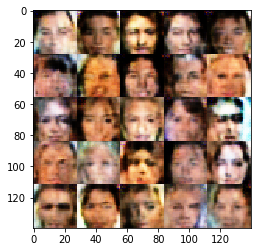

Epoch: 1 of 1
Discriminator loss: 0.667
Generator loss: 1.091
Epoch: 1 of 1
Discriminator loss: 0.573
Generator loss: 1.789
Epoch: 1 of 1
Discriminator loss: 0.320
Generator loss: 1.928
Epoch: 1 of 1
Discriminator loss: 0.426
Generator loss: 3.208
Epoch: 1 of 1
Discriminator loss: 0.126
Generator loss: 4.886


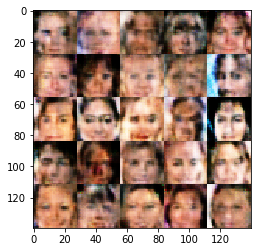

Epoch: 1 of 1
Discriminator loss: 0.486
Generator loss: 1.149
Epoch: 1 of 1
Discriminator loss: 0.669
Generator loss: 1.014
Epoch: 1 of 1
Discriminator loss: 0.750
Generator loss: 0.789
Epoch: 1 of 1
Discriminator loss: 0.259
Generator loss: 2.209
Epoch: 1 of 1
Discriminator loss: 0.215
Generator loss: 3.570


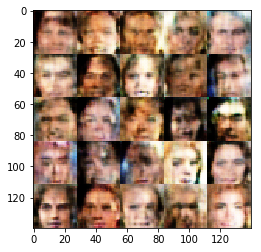

Epoch: 1 of 1
Discriminator loss: 1.038
Generator loss: 0.808
Epoch: 1 of 1
Discriminator loss: 0.575
Generator loss: 1.165
Epoch: 1 of 1
Discriminator loss: 0.940
Generator loss: 0.793
Epoch: 1 of 1
Discriminator loss: 0.998
Generator loss: 2.026
Epoch: 1 of 1
Discriminator loss: 0.507
Generator loss: 2.901


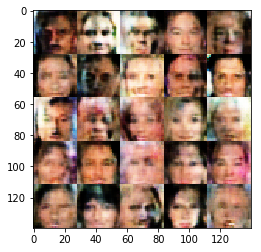

Epoch: 1 of 1
Discriminator loss: 1.185
Generator loss: 3.391
Epoch: 1 of 1
Discriminator loss: 0.318
Generator loss: 2.269
Epoch: 1 of 1
Discriminator loss: 0.412
Generator loss: 1.449
Epoch: 1 of 1
Discriminator loss: 0.408
Generator loss: 1.688
Epoch: 1 of 1
Discriminator loss: 2.254
Generator loss: 0.149


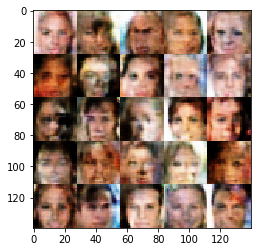

Epoch: 1 of 1
Discriminator loss: 0.545
Generator loss: 3.835
Epoch: 1 of 1
Discriminator loss: 0.988
Generator loss: 3.955
Epoch: 1 of 1
Discriminator loss: 0.619
Generator loss: 1.755
Epoch: 1 of 1
Discriminator loss: 0.303
Generator loss: 4.267
Epoch: 1 of 1
Discriminator loss: 0.553
Generator loss: 1.330


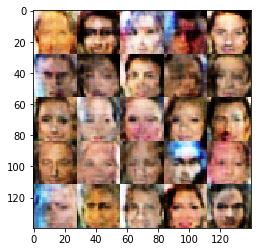

Epoch: 1 of 1
Discriminator loss: 1.885
Generator loss: 3.102
Epoch: 1 of 1
Discriminator loss: 0.131
Generator loss: 3.797
Epoch: 1 of 1
Discriminator loss: 0.973
Generator loss: 2.547
Epoch: 1 of 1
Discriminator loss: 0.825
Generator loss: 2.554
Epoch: 1 of 1
Discriminator loss: 0.315
Generator loss: 1.762


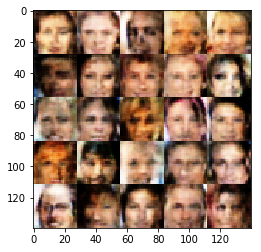

Epoch: 1 of 1
Discriminator loss: 0.282
Generator loss: 2.365
Epoch: 1 of 1
Discriminator loss: 0.574
Generator loss: 0.989
Epoch: 1 of 1
Discriminator loss: 1.641
Generator loss: 1.081
Epoch: 1 of 1
Discriminator loss: 1.109
Generator loss: 0.674
Epoch: 1 of 1
Discriminator loss: 0.536
Generator loss: 1.386


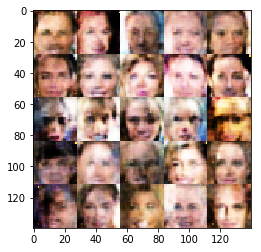

Epoch: 1 of 1
Discriminator loss: 0.240
Generator loss: 2.912
Epoch: 1 of 1
Discriminator loss: 0.375
Generator loss: 2.761
Epoch: 1 of 1
Discriminator loss: 0.522
Generator loss: 2.467
Epoch: 1 of 1
Discriminator loss: 0.472
Generator loss: 2.814
Epoch: 1 of 1
Discriminator loss: 0.398
Generator loss: 1.723


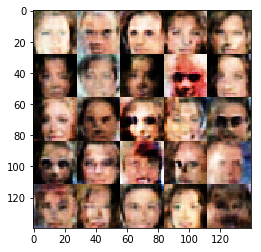

Epoch: 1 of 1
Discriminator loss: 1.178
Generator loss: 0.449
Epoch: 1 of 1
Discriminator loss: 0.723
Generator loss: 1.015
Epoch: 1 of 1
Discriminator loss: 0.223
Generator loss: 2.389
Epoch: 1 of 1
Discriminator loss: 1.456
Generator loss: 0.396
Epoch: 1 of 1
Discriminator loss: 0.198
Generator loss: 3.153


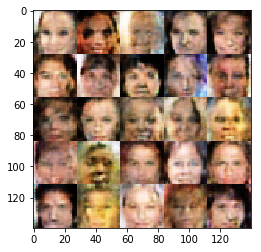

Epoch: 1 of 1
Discriminator loss: 1.293
Generator loss: 1.396
Epoch: 1 of 1
Discriminator loss: 0.574
Generator loss: 2.941
Epoch: 1 of 1
Discriminator loss: 0.997
Generator loss: 1.155
Epoch: 1 of 1
Discriminator loss: 1.285
Generator loss: 0.485
Epoch: 1 of 1
Discriminator loss: 1.026
Generator loss: 1.229


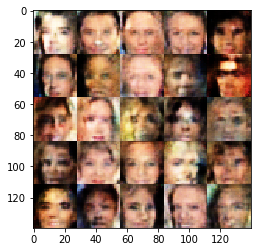

Epoch: 1 of 1
Discriminator loss: 1.094
Generator loss: 1.133
Epoch: 1 of 1
Discriminator loss: 0.363
Generator loss: 1.782
Epoch: 1 of 1
Discriminator loss: 0.940
Generator loss: 0.859
Epoch: 1 of 1
Discriminator loss: 0.446
Generator loss: 2.078
Epoch: 1 of 1
Discriminator loss: 1.463
Generator loss: 0.332


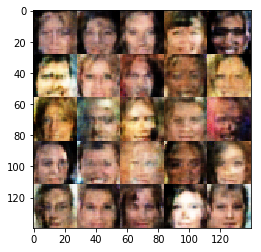

Epoch: 1 of 1
Discriminator loss: 1.061
Generator loss: 1.555
Epoch: 1 of 1
Discriminator loss: 1.232
Generator loss: 0.464
Epoch: 1 of 1
Discriminator loss: 0.530
Generator loss: 1.264


In [15]:
batch_size = 64
z_dim = 128
learning_rate = 0.0008
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.